In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc('font', family='Nanum Gothic')

In [2]:
df = pd.read_csv('~/Downloads/[28029-270] 나이키 덩크 로우 레트로 블랙 | Nike | KREAM.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21000 non-null  int64 
 1   거래일         21000 non-null  object
 2   옵션          21000 non-null  int64 
 3   거래가         21000 non-null  object
 4   빠른배송        21000 non-null  bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 676.9+ KB


In [4]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,24/09/28,270,"97,000원",True
1,1,24/09/27,270,"92,000원",False
2,2,24/09/27,270,"97,000원",True
3,3,24/09/27,270,"96,000원",True
4,4,24/09/27,270,"96,000원",True


In [5]:
df['거래일'] = pd.to_datetime(df['거래일'], format='%y/%m/%d')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  21000 non-null  int64         
 1   거래일         21000 non-null  datetime64[ns]
 2   옵션          21000 non-null  int64         
 3   거래가         21000 non-null  object        
 4   빠른배송        21000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 676.9+ KB


In [7]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,"97,000원",True
1,1,2024-09-27,270,"92,000원",False
2,2,2024-09-27,270,"97,000원",True
3,3,2024-09-27,270,"96,000원",True
4,4,2024-09-27,270,"96,000원",True


In [8]:
df['거래가'] = df['거래가'].str.replace('원','').str.replace(',','').astype(int)

In [9]:
df.head()

,Unnamed: 0,거래일,옵션,거래가,빠른배송
0,0,2024-09-28,270,97000,True
1,1,2024-09-27,270,92000,False
2,2,2024-09-27,270,97000,True
3,3,2024-09-27,270,96000,True
4,4,2024-09-27,270,96000,True


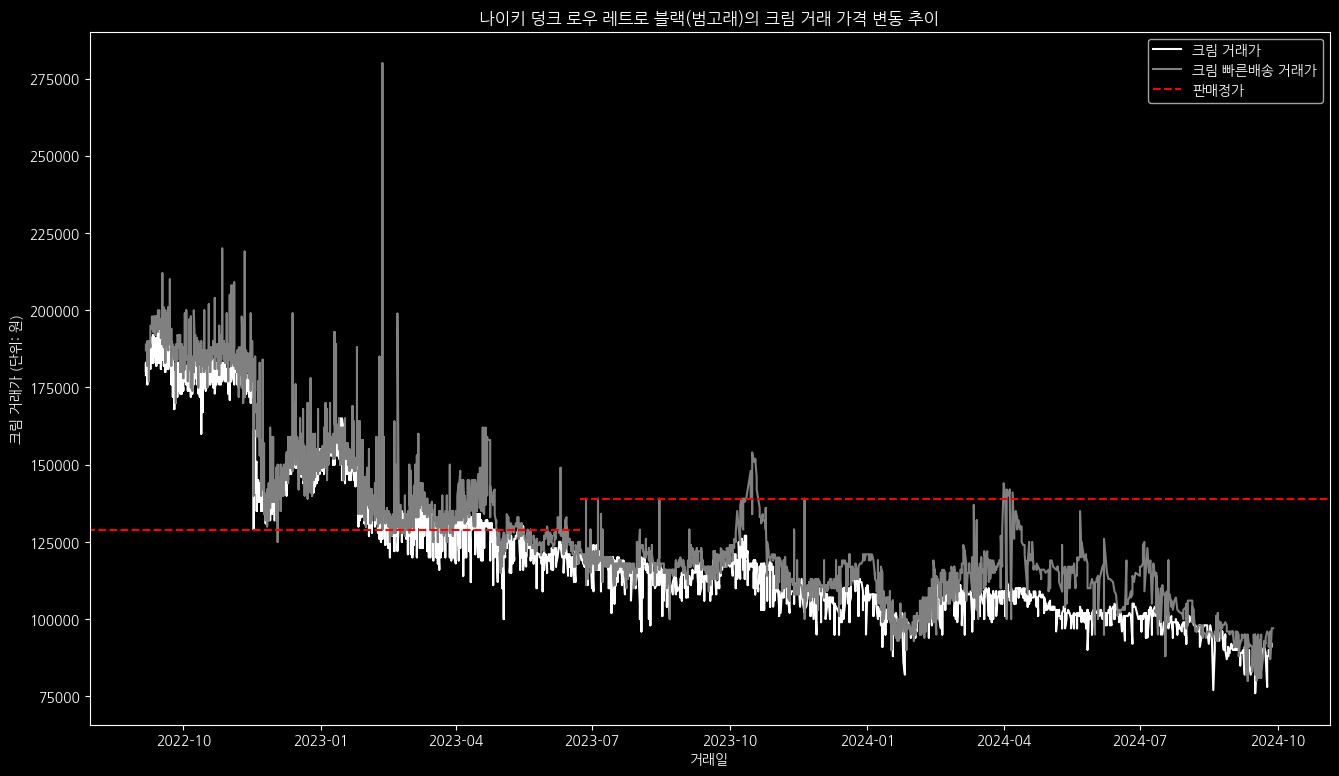

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(16,9), dpi=100)
plt.plot(df[df['빠른배송'] == False]['거래일'],df[df['빠른배송'] == False]['거래가'], color='white', label='크림 거래가')
plt.plot(df[df['빠른배송'] == True]['거래일'],df[df['빠른배송'] == True]['거래가'], color='grey', label='크림 빠른배송 거래가')

plt.axhline(y=119000, color='red', linestyle='--', xmin=0, xmax=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=129000, color='red', linestyle='--', xmin=(pd.to_datetime('2022-01-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, xmax=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days)
plt.axhline(y=139000, color='red', linestyle='--', xmin=(pd.to_datetime('2023-07-01') - df['거래일'].min()).days / (df['거래일'].max() - df['거래일'].min()).days, label='판매정가')

plt.xlabel('거래일')
plt.ylabel('크림 거래가 (단위: 원)')
plt.title('나이키 덩크 로우 레트로 블랙(범고래)의 크림 거래 가격 변동 추이')
plt.legend()

plt.show()